In [1]:
import numpy as np

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
N = 1001
l = 10
xvec = np.linspace(-l, l, N)
dx = 2*l/(N-1)
print(dx)
print(dx - (xvec[1] - xvec[0]))

0.02
4.2674197509029455e-16


In [4]:
# effective grid
# grid scaling
gs = 10
xx = np.arange((N-1)//gs + 1) * dx * gs - l
print(xx)

[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2   9.4   9.6   9.8  10. ]


In [5]:
# for plotting
sigma = dx*2
def gauss(x, i):
    return np.exp(-(x - i*gs*dx)**2 / sigma)

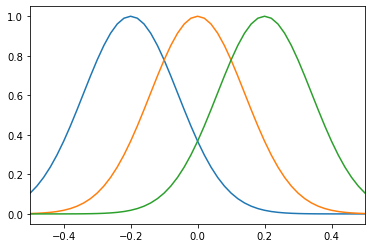

In [6]:
plt.plot(xvec, gauss(xvec,-1))
plt.plot(xvec, gauss(xvec,0))
plt.plot(xvec, gauss(xvec,1))
plt.xlim([-0.5,0.5])
plt.show()

In [7]:
gmat = np.exp(-(np.expand_dims(xx,0) - np.expand_dims(xx,1))**2 / sigma)
np.linalg.cond(gmat)

5.889589453352475

In [8]:
gmatplot = np.exp(-(np.expand_dims(xx,0) - np.expand_dims(xvec,1))**2 / sigma)
print(gmatplot.shape)

(1001, 101)


In [9]:
def myfunc(x):
    out = (x < -3)*(x+3)**3/350 + ((x >= -3) & (x < 6))*(np.exp(-x - 3) - 1) + (x >= 6)*(np.exp(-9) - 1 + (x-6)**2/14)
    return out

In [10]:
coefs = np.linalg.inv(gmat) @ myfunc(xx)

In [11]:
coefs

array([-8.22015505e-01, -4.04400705e-01, -5.00303810e-01, -4.08085551e-01,
       -3.88624453e-01, -3.45699841e-01, -3.14610618e-01, -2.82264858e-01,
       -2.53373003e-01, -2.26096349e-01, -2.01005489e-01, -1.77784685e-01,
       -1.56444262e-01, -1.36874595e-01, -1.19010184e-01, -1.02769296e-01,
       -8.80761726e-02, -7.48528531e-02, -6.30221951e-02, -5.25067343e-02,
       -4.32291818e-02, -3.51120288e-02, -2.80782701e-02, -2.20495661e-02,
       -1.69511920e-02, -1.26986013e-02, -9.23394403e-03, -6.42680206e-03,
       -4.34401795e-03, -2.51622415e-03, -1.93162265e-03,  3.83657419e-04,
       -3.36630471e-03,  8.29309964e-03, -2.26327002e-02,  5.99500295e-02,
       -1.31662255e-01, -1.80573748e-01, -2.60977061e-01, -3.11926968e-01,
       -3.59116401e-01, -3.95737557e-01, -4.26461441e-01, -4.51343424e-01,
       -4.71815355e-01, -4.88539462e-01, -5.02245574e-01, -5.13462197e-01,
       -5.22647428e-01, -5.30166983e-01, -5.36323722e-01, -5.41364343e-01,
       -5.45491288e-01, -

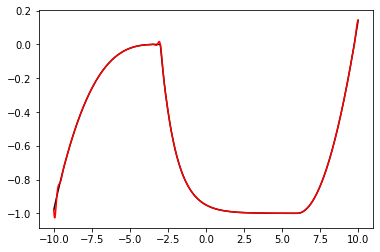

In [12]:
plt.plot(xvec, myfunc(xvec), color='black')
myfuncapprox = gmatplot @ coefs
plt.plot(xvec, myfuncapprox, color='red')
plt.show()